In [3]:
import numpy as np
import os
import ast

In [11]:
for n, row in hgtdf.iterrows():
    df=pd.read_csv(f"blast_round_two_data/{n}.tsv",sep="\t")
    gene=";".join(n.split(";")[0:2])
    interv=ast.literal_eval(n.split("_")[-1])
    leng=interv[1]-interv[0]+1
    df["cov"]=(np.array(df.qend.astype(float))-np.array(df.qstart.astype(float))+1)/leng
    dfo=df[df["cov"]>.30]
    dfo=dfo[~dfo.sphylums.astype(str).str.contains("Arthropoda")]
    dfo=dfo[~dfo.sphylums.astype(str).str.contains("Rotifera")]
    dfo=dfo[dfo.staxids.astype(str)!="nan"]
    dfo=dfo[dfo.staxids!=32630]
    dfm=dfo.iloc[0:30000,:]
    dfmeta=dfm[dfm.skingdoms.astype(str).str.contains("Metazoa")]
    dfhgt=dfm[~dfm.skingdoms.astype(str).str.contains("Metazoa")]
    dfhgt["AI"]=np.log10(dfmeta.evalue.min()+1e-200)-np.log10(dfhgt.evalue+1e-200)
    dfmeta["MI"]=np.log10(dfhgt.evalue.min()+1e-200)-np.log10(dfmeta.evalue+1e-200)
    dfmi=dfm.iloc[0:300,:]
    dfmetai=dfmi[dfmi.skingdoms.astype(str).str.contains("Metazoa")]
    dfhgti=dfmi[~dfmi.skingdoms.astype(str).str.contains("Metazoa")]
    hgtdf.loc[n,["sseqid", "stitle", "sphylums", "sscinames", "pident", "evalue", "bitscore","cov","AI"]]=dfhgt.iloc[0,:].loc[["sseqid", "stitle", "sphylums", "sscinames", "pident", "evalue", "bitscore","cov","AI"]]


/n/home11/rkapoor/.conda/envs/jupyter_3.6/lib/python3.6/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/n/home11/rkapoor/.conda/envs/jupyter_3.6/lib/python3.6/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/n/home11/rkapoor/.conda/envs/jupyter_3.6/lib/python3.6/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a

In [5]:
import pandas as pd
import os

In [10]:
import numpy as np

In [11]:
df=pd.read_csv(f"hmmer_phylogenetics_results/GCF_012932325.1;XP_034233350.1;HGT_(17,195)/filtered_taxonomic_annotated_hmmsearch_result.tsv",sep="\t",index_col=0)
dfo=df
dfo=dfo[~dfo.phylum.astype(str).str.contains("Arthropoda")]
dfo=dfo[~dfo.phylum.astype(str).str.contains("Rotifera")]

dfm=dfo.iloc[0:30000,:]
dfmeta=dfm[dfm.kingdom.astype(str).str.contains("Metazoa")]
dfhgt=dfm[~dfm.kingdom.astype(str).str.contains("Metazoa")]
AI=np.log10(dfmeta["i-Evalue"].min()+1e-200)-np.log10(dfhgt["i-Evalue"].min()+1e-200)

In [43]:
df=pd.read_csv(f"hmmer_phylogenetics_results/{xn}/filtered_taxonomic_annotated_hmmsearch_result.tsv",sep="\t",index_col=0)
dfo=df
dfo=dfo[~dfo.phylum.astype(str).str.contains("Arthropoda")]
dfo=dfo[~dfo.phylum.astype(str).str.contains("Rotifera")]

dfm=dfo.iloc[0:30000,:]
dfmeta=dfm[dfm.kingdom.astype(str).str.contains("Metazoa")]
dfhgt=dfm[~dfm.kingdom.astype(str).str.contains("Metazoa")]
AI=np.log10(dfmeta["i-Evalue"].min()+1e-200)-np.log10(dfhgt["i-Evalue"].min()+1e-200)


In [12]:
for n, row in hgtdf.iterrows():
    try:
        df=pd.read_csv(f"hmmer_phylogenetics_results/{n}/filtered_taxonomic_annotated_hmmsearch_result.tsv",sep="\t",index_col=0)
        dfo=df
        dfo=dfo[~dfo.phylum.astype(str).str.contains("Arthropoda")]
        dfo=dfo[~dfo.phylum.astype(str).str.contains("Rotifera")]

        dfm=dfo.iloc[0:30000,:]
        dfmeta=dfm[dfm.kingdom.astype(str).str.contains("Metazoa")]
        dfhgt=dfm[~dfm.kingdom.astype(str).str.contains("Metazoa")]
        AI=np.log10(dfmeta["i-Evalue"].min()+1e-200)-np.log10(dfhgt["i-Evalue"].min()+1e-200)
        hgtdf.loc[n,["hmmer_min_evalue","Hmmer_superkingdom","Hmmer_phylum","Hmmer_sci_name"]]=dfhgt.sort_values("i-Evalue").iloc[0,:].loc[["i-Evalue","superkingdom","phylum","sci_name"]].values
        hgtdf.loc[n,"hmmer_AI"]=AI
    except:
        df=pd.read_csv(f"hmmer_phylogenetics_results/{n}/filtered_taxonomic_annotated_hmmsearch_result.tsv",index_col=0)
        dfo=df
        dfo=dfo[~dfo.phylum.astype(str).str.contains("Arthropoda")]
        dfo=dfo[~dfo.phylum.astype(str).str.contains("Rotifera")]

        dfm=dfo.iloc[0:30000,:]
        dfmeta=dfm[dfm.kingdom.astype(str).str.contains("Metazoa")]
        dfhgt=dfm[~dfm.kingdom.astype(str).str.contains("Metazoa")]
        AI=np.log10(dfmeta["i-Evalue"].min()+1e-200)-np.log10(dfhgt["i-Evalue"].min()+1e-200)
        hgtdf.loc[n,["hmmer_min_evalue","Hmmer_superkingdom","Hmmer_phylum","Hmmer_sci_name"]]=dfhgt.sort_values("i-Evalue").iloc[0,:].loc[["i-Evalue","superkingdom","phylum","sci_name"]].values
        hgtdf.loc[n,"hmmer_AI"]=AI
        df.to_csv(f"hmmer_phylogenetics_results/{n}/filtered_taxonomic_annotated_hmmsearch_result.tsv",sep="\t")

In [13]:
symbionts={}
for x,row in hgtdf.iterrows():
  
    df=pd.read_csv(f"hmmer_phylogenetics_results/{x}/filtered_taxonomic_annotated_hmmsearch_result.tsv",sep="\t",index_col=0)
    df=df.fillna(0)
    df=df[df.phylum!="Arthropoda"]
    df=df[df['i-Evalue']<1e-10].sort_values('i-Evalue').iloc[0:200,:]
    bionts=set()
    
    hgtdf.loc[x,"Symbionts (any)"]=str(set(df[df["sci_name"].astype(str).str.contains("symbiont")].sci_name))
    hgtdf.loc[x,"Wolbachia"]=str(set(df[df["sci_name"].astype(str).str.contains("Wolbachia")].sci_name))
    hgtdf.loc[x,"Rickettsia"]=str(set(df[df["sci_name"].astype(str).str.contains("Rickettsia")].sci_name))
    hgtdf.loc[x,"Coxiella"]=str(set(df[df["sci_name"].astype(str).str.contains("Coxiella")].sci_name))
    hgtdf.loc[x,"Buchnera"]=str(set(df[df["sci_name"].astype(str).str.contains("Buchnera")].sci_name))
    hgtdf.loc[x,"Wigglesworthia"]=str(set(df[df["sci_name"].astype(str).str.contains("Wigglesworthia")].sci_name))
    hgtdf.loc[x,"Burkholderia"]=str(set(df[df["sci_name"].astype(str).str.contains("Burkholderia")].sci_name))
    hgtdf.loc[x,"Vibrio"]=str(set(df[df["sci_name"].astype(str).str.contains("Vibrio")].sci_name))
    hgtdf.loc[x,"Spiroplasma"]=str(set(df[df["sci_name"].astype(str).str.contains("Spiroplasma")].sci_name))
    hgtdf.loc[x,"Hamiltonella"]=str(set(df[df["sci_name"].astype(str).str.contains("Hamiltonella")].sci_name))
    hgtdf.loc[x,"Sodalis"]=str(set(df[df["sci_name"].astype(str).str.contains("Sodalis")].sci_name))
    hgtdf.loc[x,"Borrelia"]=str(set(df[df["sci_name"].astype(str).str.contains("Borrelia")].sci_name))
    hgtdf.loc[x,"Entomoplasma"]=str(set(df[df["sci_name"].astype(str).str.contains("Entomoplasma")].sci_name))
hgtdf=hgtdf.replace("set()","None")

In [15]:
df_cluster=pd.read_csv("corrected_cluster_info.tsv",sep="\t")
intervals=[]
for index, row in df_cluster.iterrows():
    intervals.extend(ast.literal_eval(row.HGT_intervals))

In [16]:
bact=hgtdf[(hgtdf["Donor superkingdom(s)"].str.contains("Bacteria"))&(hgtdf.index.isin(intervals))]
dfsymb=pd.DataFrame()
symb=['Symbionts (any)', 'Wolbachia', 'Rickettsia', 'Coxiella', "Sodalis",'Spiroplasma','Buchnera', 'Wigglesworthia', 'Hamiltonella','Vibrio']
ind=set()
for s in symb:
    dfsymb.loc[s,"Number of HGT Intervals"]=bact[bact[s]!="set()"].shape[0]
    ind=ind|set(bact[bact[s]!="set()"].index)
dfsymb.sort_values(by="Number of HGT Intervals",ascending=False).to_csv("bacteria_donor_genra.csv")
n=dfsymb[dfsymb["Number of HGT Intervals"]>0].shape[0]

In [30]:
hgtdf.loc[:,['Tree_inferred_donor_superkingdom(s)', 'chimera_organism', 'blast_hit_sseqid', 'blast_hit_title', 'blast_hit_phylums',
       'blast_sci_name','blast_hit_evalue', 'blast_hit_pident', 
       'blast_hit_bitscore', 'blast_hit_coverage', 'blast_hit_AI',
       'hmmer_min_evalue', 'hmmer_superkingdom', 'hmmer_phylum',
       'hmmer_sci_name', 'hmmer_AI', 'hmmer_Symbionts (any)',
       'hmmer_Wolbachia', 'hmmer_Rickettsia', 'hmmer_Coxiella',
       'hmmer_Buchnera', 'hmmer_Wigglesworthia', 'hmmer_Burkholderia',
       'hmmer_Vibrio', 'hmmer_Spiroplasma', 'hmmer_Hamiltonella',
       'hmmer_Sodalis', 'hmmer_Borrelia', 'hmmer_Entomoplasma']].to_csv("hgt_interval_data.tsv",sep="\t")

In [81]:
## load origins data after manual inspection/correction
hgtdf=pd.read_csv("data_upload_3_24_2025/Supplementary Table VI_ HGT origin data - hgt_interval_data.tsv",sep="\t",index_col=0)

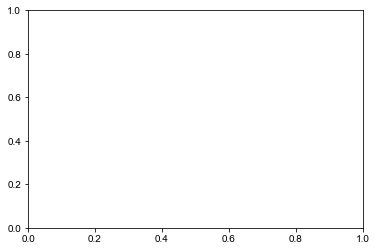

In [74]:
import matplotlib.pyplot as plt

import matplotlib.font_manager
from matplotlib.font_manager import FontProperties

from pathlib import Path

import matplotlib as mpl
from matplotlib.patches import Patch
from matplotlib.lines import Line2D

fig, ax = plt.subplots()

fpath = Path(mpl.get_data_path(), "/n/holylabs/LABS/extavour_lab/Users/rkapoor/envs/plot/fonts/arial.ttf")
from matplotlib.font_manager import FontProperties
from matplotlib import font_manager
plt.rcParams['figure.dpi'] = 300
font_path = "/n/holylabs/LABS/extavour_lab/Users/rkapoor/envs/plot/fonts/arial.ttf"
font_manager.fontManager.addfont("/n/holylabs/LABS/extavour_lab/Users/rkapoor/envs/plot/fonts/arial.ttf")
prop = font_manager.FontProperties(fname=font_path)
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = prop.get_name()
import pandas as pd
from collections import Counter
import ast

## Figure 3

In [179]:
## load origins data after manual inspection/correction
hgtdf=pd.read_csv("data_upload_3_24_2025/Supplementary Table VI_ HGT origin data - hgt_interval_data.tsv",sep="\t",index_col=0)

In [180]:
origins=hgtdf["Tree_inferred_donor_superkingdom(s)"]
origins2=[]
for o in origins:
    origins2.extend(o.split(","))
m=dict(Counter(origins2))
m=dict(sorted(m.items(), key=lambda item: item[1],reverse=True))

In [181]:
bact=hgtdf[(hgtdf["Tree_inferred_donor_superkingdom(s)"].str.contains("Bacteria"))]
dfsymb=pd.DataFrame()
symb=['Symbionts (any)', 'Wolbachia', 'Rickettsia', 'Coxiella', "Sodalis",'Spiroplasma','Buchnera', 'Wigglesworthia', 'Hamiltonella','Vibrio']
ind=set()
intervals=set()
for s in symb:
    dfsymb.loc[s,"Number of HGT Intervals"]=bact[bact[s]!="None"].shape[0]
    ind=ind|set(bact[bact[s]!="set()"].index)
    intervals=intervals|set(bact[bact[s]!="set()"].index)
dfsymb=dfsymb.sort_values(by="Number of HGT Intervals",ascending=False)
dfsymb=dfsymb[dfsymb["Number of HGT Intervals"]>0]
n=dfsymb.shape[0]

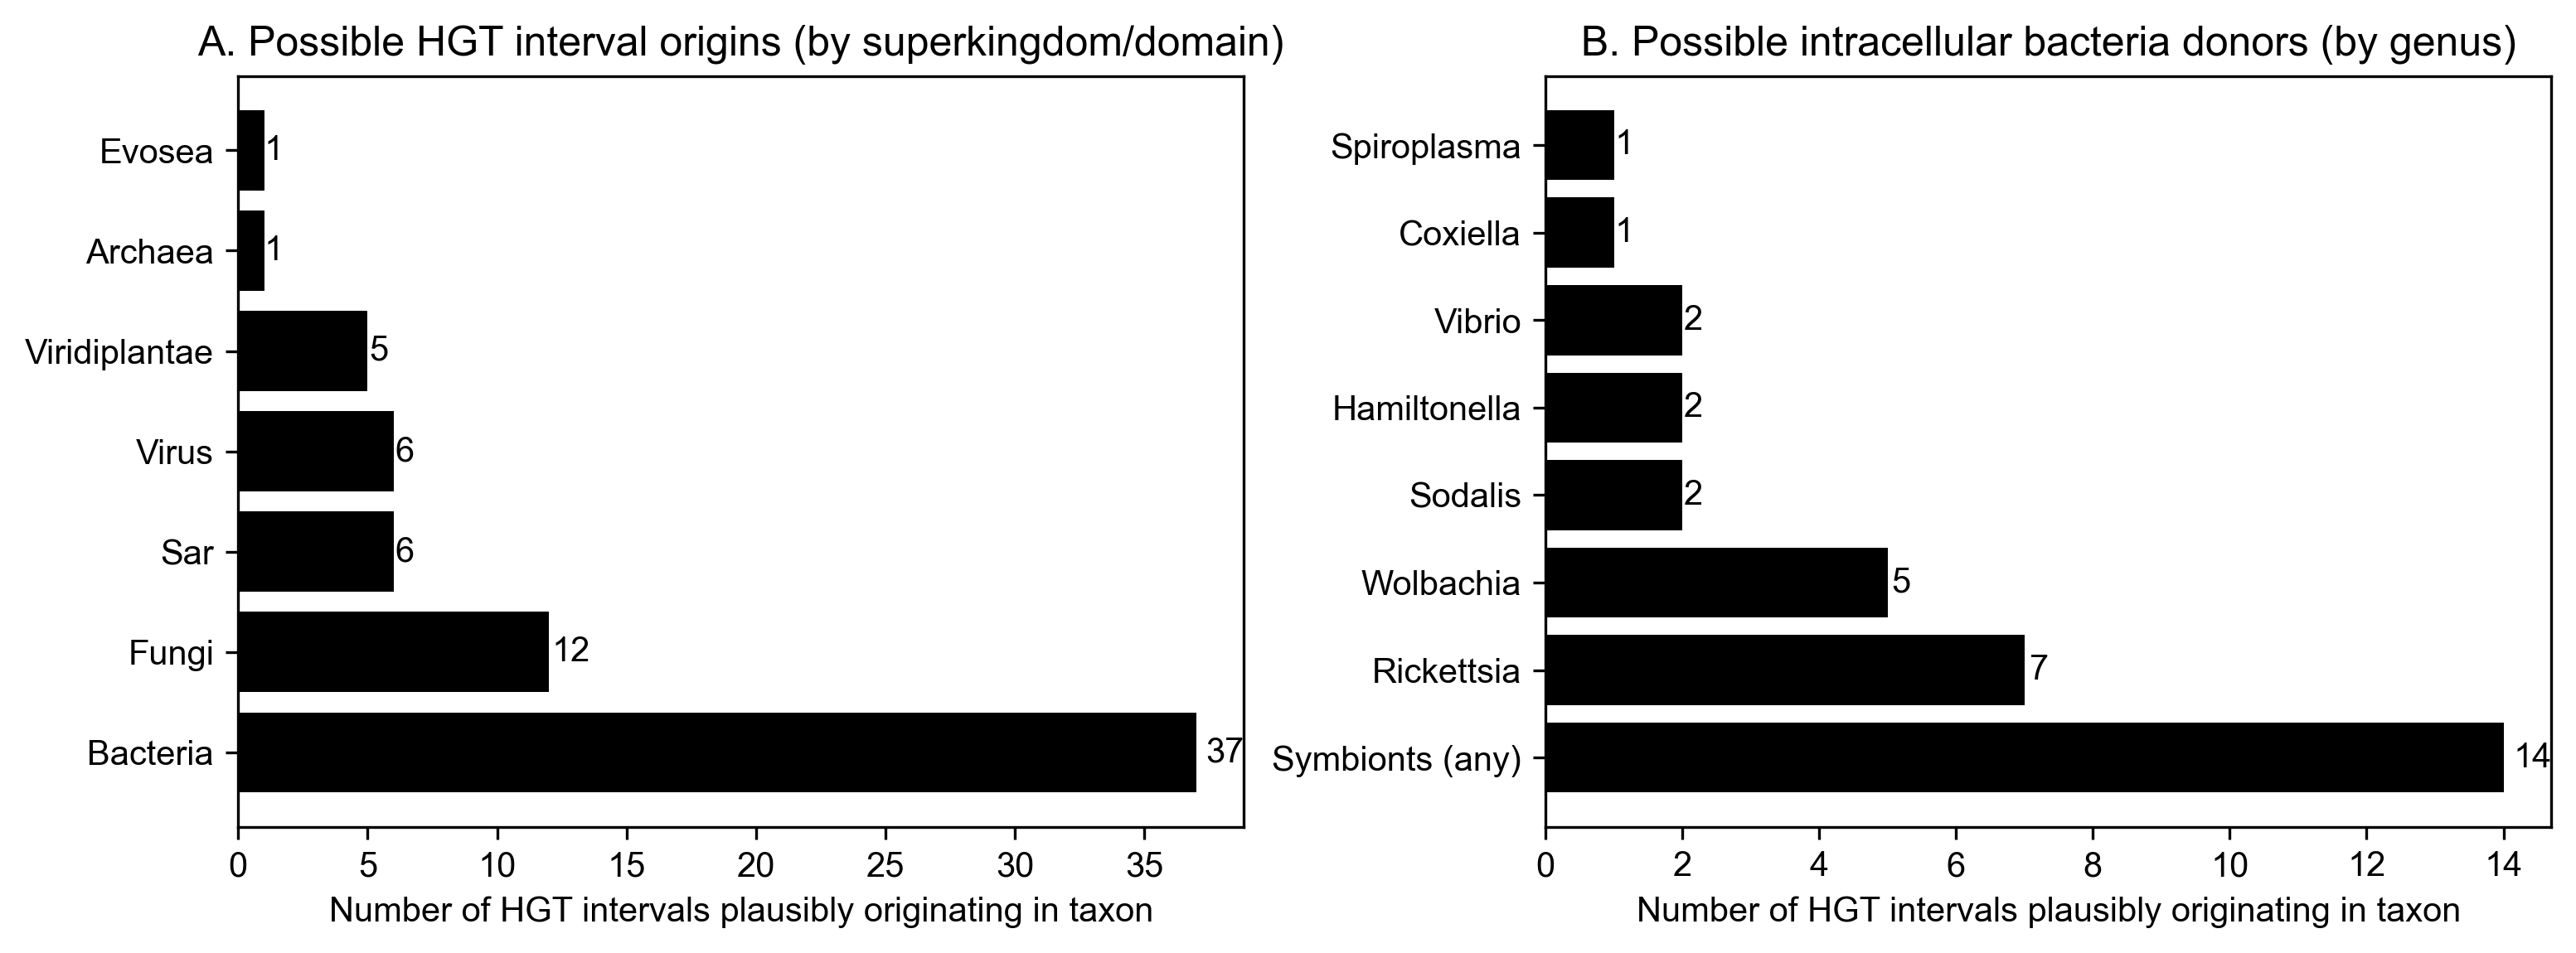

In [182]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2, figsize=(12, 4), gridspec_kw={'hspace': 5}) # Adjust hspace as needed

# Plot for the first subplot
bars1 = ax[0].barh([x for x in m], [m[x] for x in m], color='black')
ax[0].set_xlabel("Number of HGT intervals plausibly originating in taxon")
ax[0].set_title("A. Possible HGT interval origins (by superkingdom/domain)")

# Add numbers next to each bar in the first subplot
for bar in bars1:
    width = bar.get_width()
    ax[0].text(width + 0.01 * width, bar.get_y() + bar.get_height()/2, f'{width:.0f}', 
               va='center', ha='left', fontsize=10)

# Plot for the second subplot
bars2 = ax[1].barh([x for x in dfsymb.index], dfsymb["Number of HGT Intervals"], color='black')
ax[1].set_xlabel("Number of HGT intervals plausibly originating in taxon")
ax[1].set_title("B. Possible intracellular bacteria donors (by genus)")

# Add numbers next to each bar in the second subplot
for bar in bars2:
    width = bar.get_width()
    ax[1].text(width + 0.01 * width, bar.get_y() + bar.get_height()/2, f'{width:.0f}', 
               va='center', ha='left', fontsize=10)

plt.subplots_adjust(wspace=.3, hspace=1.5)
fig.savefig("combined_HGT_interval_origins.svg", format="svg", bbox_inches="tight")
fig.savefig("combined_HGT_interval_origins.png", format="png", bbox_inches="tight")
plt.show()
